## basic calculus, Drivatives, Integrals, Limits, Series expansion, Finite differences
from https://docs.sympy.org/latest/tutorial/solvers.html#tutorial-dsolve

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)


### Derivatives

In [2]:
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

diff(exp(x**2), x)

In [3]:
diff(cos(x), x)

In [4]:
diff(x**4, x, x, x)

In [5]:
diff(x**4, x, 3)

In [6]:
expr = exp(x*y*z)
diff(expr, x, y, y, z, z, z, z)
diff(expr, x, y, 2, z, 4)
diff(expr, x, y, y, z, 4)
expr.diff(x, y, y, z, 4)
deriv = Derivative(expr, x, y, y, z, 4)
deriv.doit()

m, n, a, b = symbols('m n a b')
expr = (a*x + b)**m
expr.diff((x, n))

AttributeError: 'Tuple' object has no attribute '_diff_wrt'

In [ ]:
### Integrals

In [7]:
integrate(cos(x), x)

In [8]:
integrate(exp(-x), (x, 0, oo))

In [9]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

Integral(x**x, x)


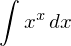

In [10]:
expr = integrate(x**x, x)
print(expr)
expr

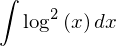

In [11]:
expr = Integral(log(x)**2, x)
expr

In [12]:
expr.doit()

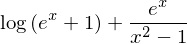

In [13]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x - exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)

integ.doit()

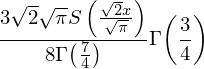

In [14]:
integ = Integral(sin(x**2), x)
integ.doit()

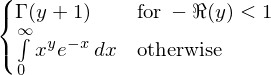

In [24]:
integ = Integral(x**y*exp(-x), (x, 0, oo))
integ.doit()

### Limits

In [15]:
limit(sin(x)/x, x, 0)

In [27]:
expr = x**2/exp(x)

In [28]:
expr.subs(x, oo)

In [29]:
limit(expr, x, oo)

In [31]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr.doit()

In [32]:
limit(1/x, x, 0, '+')

In [33]:
limit(1/x, x, 0, '-')

### Series Expansion

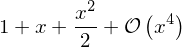

In [34]:
expr = exp(sin(x))
expr.series(x, 0, 4)

In [35]:
x + x**3 + x**6 + O(x**4)
x*O(1)

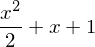

In [36]:
expr.series(x, 0, 4).removeO()

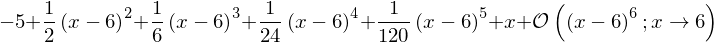

In [37]:
exp(x - 6).series(x, x0=6)

### Finite differences

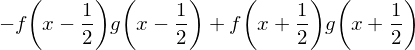

In [38]:
f, g = symbols('f g', cls=Function)
differentiate_finite(f(x)*g(x))

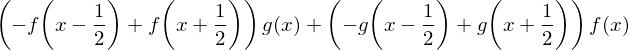

In [39]:
differentiate_finite(f(x)*g(x), evaluate=True)

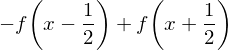

In [43]:
f = Function('f')
dfdx = f(x).diff(x)
dfdx.as_finite_difference()

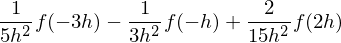

In [44]:
f = Function('f')
d2fdx2 = f(x).diff(x, 2)
h = Symbol('h')
d2fdx2.as_finite_difference([-3*h,-h,2*h])



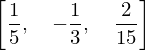

In [45]:
finite_diff_weights(2, [-3, -1, 2], 0)[-1][-1]


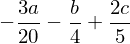

In [46]:
x_list = [-3, 1, 2]
y_list = symbols('a b c')
apply_finite_diff(1, x_list, y_list, 0)


#### Solving deffiernetial equations, https://docs.sympy.org/latest/tutorial/solvers.html#tutorial-dsolve

In [ ]:
f, g = symbols('f g', cls=Function)
f(x)
f(x).diff(x)
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
dsolve(diffeq, f(x))
dsolve(f(x).diff(x)*(1 - sin(f(x))) - 1, f(x))

## Integration of simple function

In [ ]:
#Code from http://publish.illinois.edu/pillsburydoughcat/hw1/hw1-supplementary-material/
#GEOL 497 – HW 1 – Problem 1
#libraries
from scipy import integrate
import numpy

#method
method = 1 #0, scipy; 1, own; 2, analytical
a = 1.
b = .01
c = 1.
lower_lim = 0. #lower limit of itegral
upper_lim = 100. #upper limit of itegral
cells = 10 # number of cells in own method

#function- this is the equation
def equation(x,a,b,c):
    return (a*numpy.exp(b*x))+c

def inte(a,b,c,method,lower_lim,upper_lim,cells): #integrating function
    if method == 0: #scipy method
        ans = integrate.quad(equation,lower_lim,upper_lim,args=(a,b,c))
    elif method == 1:#trapezoidal integration
        dx = (upper_lim - lower_lim)/cells
        ans = 0.0
        for i in range(0,cells):
            ans = ans + dx/2.0*(equation(dx*i,a,b,c)+equation(dx*(i+1),a,b,c))
    elif method ==2: #analytical solution
        ans  = a/b*(numpy.exp(b*upper_lim)-numpy.exp(b*lower_lim))+c*(upper_lim-lower_lim)
    else: #bad input, need another method
        print('invalid method value')
    return ans


ans = inte(a,b,c,method,lower_lim,upper_lim,cells) #call integration
print(ans) #print answer)

In [ ]:
## Make random normal distribution

In [ ]:
#Code from http://publish.illinois.edu/pillsburydoughcat/hw1/hw1-supplementary-material/
#GEOL 497 – HW 1 – Problem 2
#libraries
import numpy
import random
import matplotlib.pyplot as plt

num_pts = int(1E4) #number of points
avg = 0. #mean
b = 1. #standard deviation
n = 100 #number of bins

def hist(avg,b,n,num_pts): #histogram function
    x = numpy.zeros(num_pts) #x array
    for i in range(0,num_pts): #fill with random numbers
        x[i] = random.gauss(avg,b)
    plt.hist(x,bins=n) #histogram
    plt.title('Normal Distribution Historgram') #title
    plt.xlabel('value') #x label
    plt.ylabel('frequency') # y label
    plt.show() # show plot

hist(avg,b,n,num_pts) #call function

## Numerically approximates the volume of 3-sphere

In [ ]:
#Code from http://publish.illinois.edu/pillsburydoughcat/hw1/hw1-supplementary-material/
#GEOL 497 – HW 1 – Problem 3
#libraries
import numpy
import random

#Monte Carlo Integration
#guess a value in a uniform distrbution of known value
#and check to see if pt is within boundary. ration is an estimate
#of volume
dimension = 4 #2 for circle, 3 for tradional sphere, 4 for 3-sphere
num_rnd = 10000 #number of random guesses
r = 5. #radius in cm
bol = numpy.zeros((num_rnd),dtype=int) #number of pts in boundary

known_V = (2.0*r)**float(dimension) #volume of guessing area
ratio_num=0#counter

for i in range(0,num_rnd):
    sum_cir = 0#guess
    for j in range(0,dimension): #guess by dimension
        guess = r * (random.random() * 2.0-1.0)
        sum_cir+=guess**2.0
    if sum_cir<=r**2.0:#add a value is point in bounding box
        ratio_num+=1

#volume estimation
guessed_V = float(ratio_num)/float(num_rnd)*known_V
V_2 = numpy.pi*(r**2.0)
V_3 = 4.0/3.0*numpy.pi*(r**3.0)
V_4 = 1.0/2.0*(numpy.pi**2.0)*(r**4.0)

#print answer
print(guessed_V)
if dimension ==2:
    print(V_2)
elif dimension ==3:
    print(V_3)
elif dimension ==4:
    print(V_4)
else:
    print('bad input')

## Applications of Integration


https://www.whitman.edu/mathematics/acalculus_online/chapter09.html
    
    